# DEC PDF Text Extraction

In [320]:
import pandas as pd
import numpy as np
import pdfplumber
from tqdm import tqdm

## Import Joined DEC_J2SR Data

In [321]:
dec_j2sr_data = pd.read_csv('dec_j2sr_nn.csv')
dec_j2sr_data.shape

(2320, 65)

In [322]:
from random import seed
from random import randint

file_number = randint(0,dec_j2sr_data.shape[0])
file_number

1622

In [324]:
url

'http://pdf.usaid.gov/pdf_docs/PA00MBJW.pdf'

In [ ]:
import urllib.request

print('Beginning file download with urllib2...')

url = str(dec_j2sr_data['File'][file_number])
name = str(dec_j2sr_data['Unique_ID'][file_number])
path = '/home/aaron/Desktop/dec_j2sr/' + name + '.pdf'
urllib.request.urlretrieve(url, path)

In [55]:
with pdfplumber.open(path) as pdf:
    first_page = pdf.pages[2]

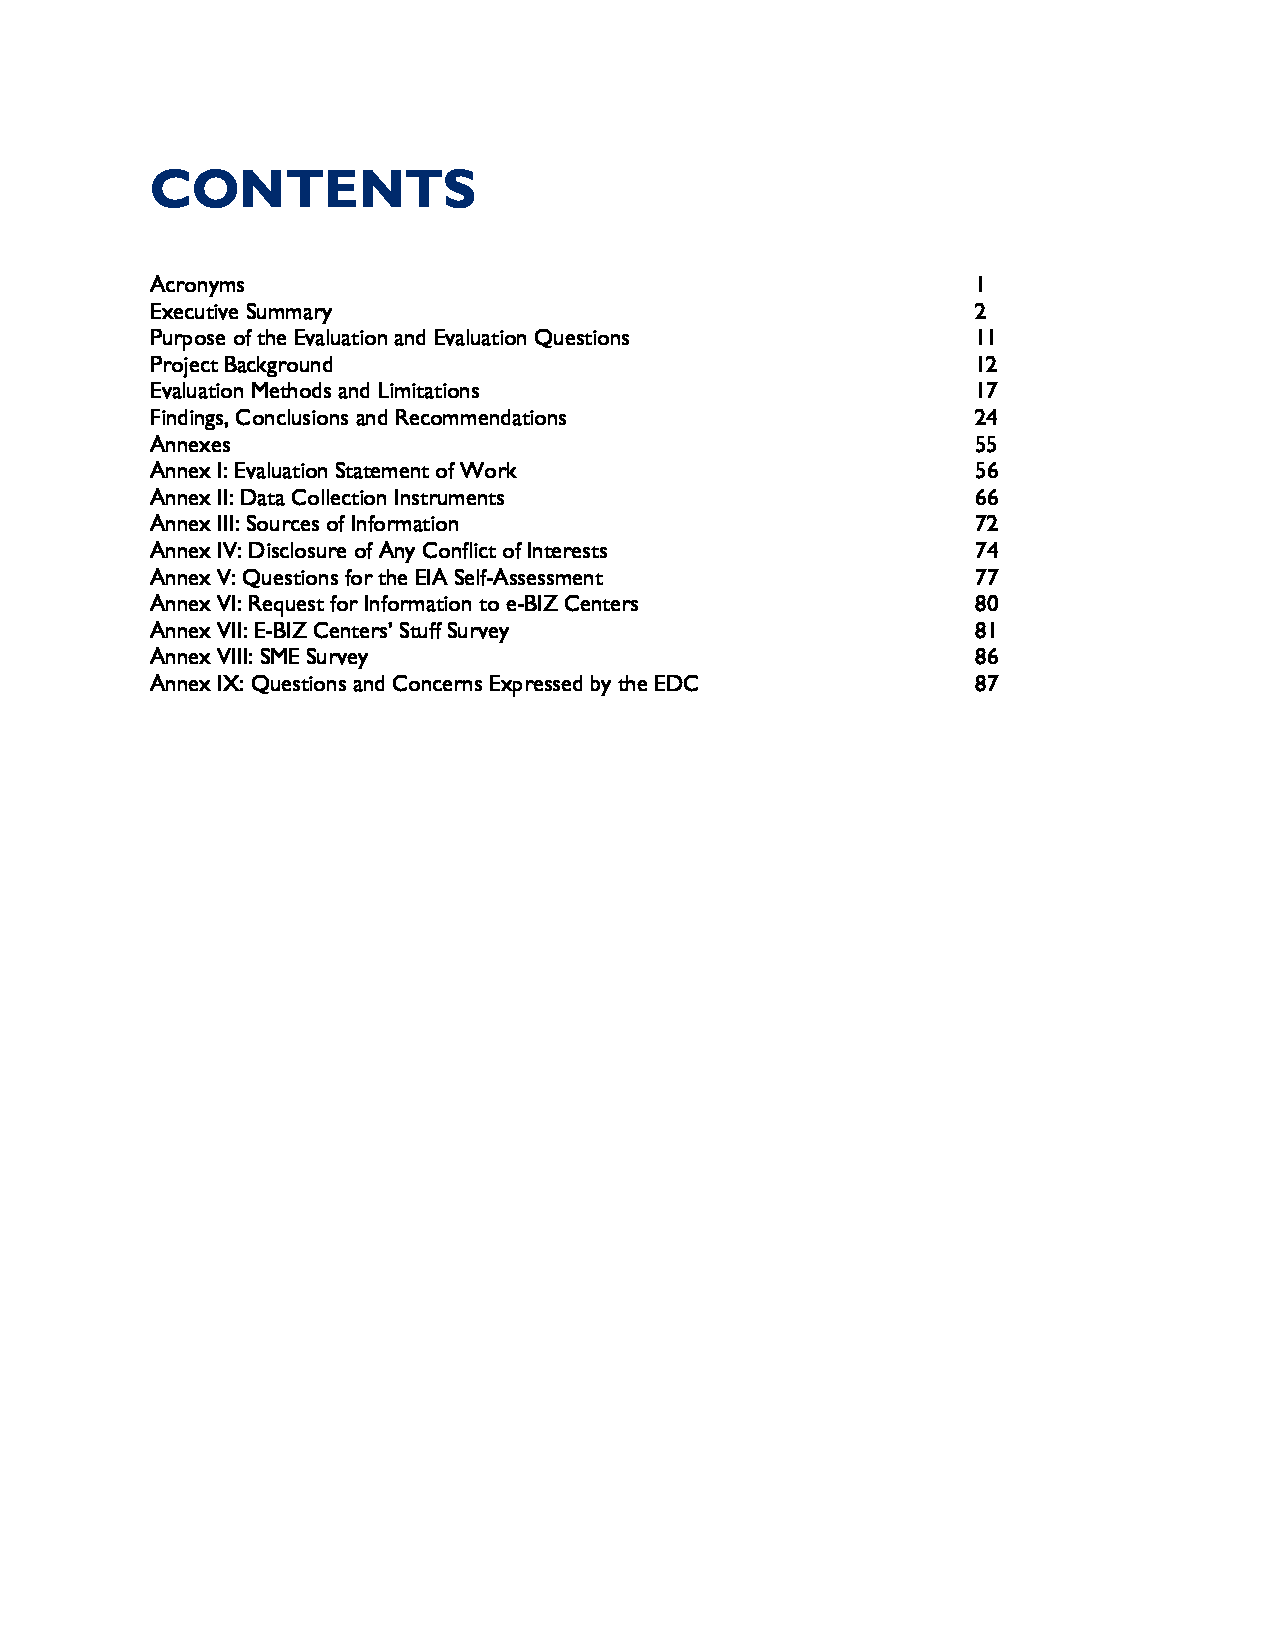

In [56]:
first_page.to_image(resolution=150)

In [51]:
with pdfplumber.open(path) as pdf:
    first_page = pdf.pages[2]
    first_page_text = first_page.extract_text(x_tolerance=3, y_tolerance=3)

In [52]:
first_page_text

' \nCONTENTS \n \n \nAcronyms                    1 \nExecutive Summary                  2 \nPurpose of the Evaluation and Evaluation Questions          11 \nProject Background                  12 \nEvaluation Methods and Limitations              17 \nFindings, Conclusions and Recommendations            24 \nAnnexes                    55 \nAnnex I: Evaluation Statement of Work             56   \nAnnex II: Data Collection Instruments              66 \nAnnex III: Sources of Information              72 \nAnnex IV: Disclosure of Any Conflict of Interests          74 \nAnnex V: Questions for the EIA Self-Assessment          77 \nAnnex VI: Request for Information to e-BIZ Centers          80 \nAnnex VII: E-BIZ Centers’ Stuff Survey              81 \nAnnex VIII: SME Survey                 86 \nAnnex IX: Questions and Concerns Expressed by the EDC        87 \n                     \n \n '

In [53]:
first_page_split = pd.DataFrame(first_page_text.split('\n'))
first_page_split

,0
0,
1,CONTENTS
2,
3,
4,Acronyms 1
5,Executive Summary 2
6,Purpose of the Evaluation and Evaluation Quest...
7,Project Background 12
8,Evaluation Methods and Limitations ...
9,"Findings, Conclusions and Recommendations ..."


In [57]:
first_page_clean = first_page_split[~first_page_split.loc[:,0].isin([' '])]
first_page_clean

,0
1,CONTENTS
4,Acronyms 1
5,Executive Summary 2
6,Purpose of the Evaluation and Evaluation Quest...
7,Project Background 12
8,Evaluation Methods and Limitations ...
9,"Findings, Conclusions and Recommendations ..."
10,Annexes 55
11,Annex I: Evaluation Statement of Work ...
12,Annex II: Data Collection Instruments ...


In [148]:
pdf_frame = pd.DataFrame(np.nan, index=range(100), columns=range(len(pdf.pages)))

In [149]:
for page in tqdm(range(len(pdf.pages))):
    with pdfplumber.open(path) as pdf:
        current_page = pdf.pages[page]
        current_page_text = current_page.extract_text(x_tolerance=3, y_tolerance=3)
        if current_page_text is not None:
            current_page_split = pd.DataFrame(current_page_text.split('\n'))
        current_page_clean = current_page_split[~current_page_split.loc[:,0].isin([' '])]
        pdf_frame.loc[:,page] = current_page_clean.reset_index().loc[:,0]

100%|██████████| 153/153 [41:20<00:00, 16.21s/it]


In [150]:
pdf_frame.dropna(how='all',inplace=True)
pdf_frame.dropna(how='all',axis=1, inplace=True)

pdf_frame.to_csv('pdf_frame_ex.csv')

In [226]:
# Replace column names with page numbers
pdf_frame_pages = []

not_found_num = 0

for col in range(pdf_frame.shape[1]):
    non_nan_col = pdf_frame.loc[:,col][pdf_frame.loc[:,col].notna()]
    last_row = non_nan_col[non_nan_col.shape[0]-1]
    page = re.findall(r'\d+', last_row)
    if not page:
        page = ["nf" + str(not_found_num)]
        not_found_num += 1
    col_name = "page" + "_" + page[0]
    pdf_frame_pages.append(col_name)

['page_nf0',
 'page_nf1',
 'page_nf2',
 'page_1',
 'page_2',
 'page_3',
 'page_4',
 'page_5',
 'page_6',
 'page_7',
 'page_8',
 'page_9',
 'page_10',
 'page_11',
 'page_12',
 'page_13',
 'page_14',
 'page_15',
 'page_16',
 'page_17',
 'page_18',
 'page_19',
 'page_20',
 'page_21',
 'page_22',
 'page_23',
 'page_24',
 'page_25',
 'page_26',
 'page_27',
 'page_28',
 'page_29',
 'page_30',
 'page_31',
 'page_32',
 'page_33',
 'page_34',
 'page_35',
 'page_36',
 'page_37',
 'page_38',
 'page_39',
 'page_40',
 'page_41',
 'page_42',
 'page_43',
 'page_44',
 'page_nf3',
 'page_46',
 'page_47',
 'page_48',
 'page_49',
 'page_50',
 'page_51',
 'page_52',
 'page_53',
 'page_54',
 'page_55',
 'page_56',
 'page_57',
 'page_58',
 'page_59',
 'page_60',
 'page_61',
 'page_62',
 'page_63',
 'page_64',
 'page_65',
 'page_66',
 'page_67',
 'page_68',
 'page_69',
 'page_70',
 'page_71',
 'page_72',
 'page_73',
 'page_74',
 'page_75',
 'page_76',
 'page_77',
 'page_78',
 'page_79',
 'page_80',
 'page_81

In [250]:
first_page_index = pd.Series(pdf_frame_pages).str.contains("page_1").idxmax()
new_pages = []
for col in range(len(pdf_frame_pages)):
    new_pages.append(col - first_page_index + 1)
    
len(new_pages) == len(pdf_frame_pages)

True

In [251]:
pdf_frame_new = pdf_frame
pdf_frame_new.columns = new_pages
pdf_frame_new

,-2,-1,0,1,2,3,4,5,6,7,...,141,142,143,144,145,146,147,148,149,150
0,,Perf ormance Evaluation of the Excellence in I...,CONTENTS,ACRONYMS,EXECUTIVE SUMMARY,sustainability of the e-BIZ centers.,"EVALUATION QUESTIONS, DESIGN, METHODS AND LIMI...",The e-BIZ center TTC has also brought importan...,The Evaluation Team received a folder titled '...,Many factors prevented the buildup of the e-BI...,...,Cooperative Agreement Number: 168-A-00-07-0010...,Cooperative Agreement Number: 168-A-00-07-0010...,Cooperative Agreement Number: 168-A-00-07-0010...,Cooperative Agreement Number: 168-A-00-07-0010...,Cooperative Agreement Number: 168-A-00-07-0010...,Cooperative Agreement Number: 168-A-00-07-0010...,Cooperative Agreement Number: 168-A-00-07-0010...,ANNEX 10,"new technology, it should not be available in ...",It is important to stress that all e-BIZ Cente...
1,December 2013,Activity,Acronyms 1,AED The Academy for Educational Development,This report is a performance evaluation ...,The Evaluation Team has strong reservations ab...,In order to answer the main evaluation questio...,"pattern/prototype development, grading, marker...","however, a subsequent review of the submitted ...",to insufficient attention and effort to provid...,...,Modification No. 11,Modification No. 11,Modification No. 11,Modification No. 11,Modification No. 11,Modification No. 11,Modification No. 11,PERFORMANCE EVALUATION OF THE EXCELENCE IN INN...,market research. Since 2008 ICT sector develop...,"entities. For example, Transwork e-BIZ ..."
2,This publication was produced at the request o...,PERFORMANCE,Executive Summary 2,AFIP Agency for Financial Information and C...,International Development (USAID) mission in B...,the e-BIZ centers and interviewed SMEs. ...,"e-BIZ center staff, the financial and op...",technology for these operations does not exist...,created on 25.07.2013.,in specific industries. Having in mind that e-...,...,Lack of ability to use ICT to compete. Busi...,The issue with Exploring BH’s online por...,Anticipated Support – Textile Sector,Development of Client Relationship Managemen...,Gathering and updating the list of existing ...,ARTECO,"such, EDC is responsible for the Project offic...",ACTIVITY,impact on the EI Activity initial design. Exam...,Pivara.
3,prepared independently by Davorin Pavelic (Tea...,EVALUATION OF THE,Purpose of the Evaluation and Evaluation Quest...,AOR Agreement Officer Representative,"Activity (EIA), an economic development activi...",evaluation process at several points by adjust...,"competitiveness of SME clients, the Evalu...",because all of these operations can be done ma...,The review of the documents also resulted in t...,dissemination and transfer of new high impact ...,...,"need to utilize ICT effectively, but lack the ...",firm ownership -- i.e. the partnership between...,Background,improve their marketing and client relationshi...,Management (CRM) database;,Completed Customer Relationship Management D...,day-to-day basis.,INTERVIEW MINUTES,made Exploring B&H booking function obsolete. ...,When Exploring B&H started with tourism web si...
4,Danijel Hopic (Senior Evaluation Specialist).,EXCELLENCE IN,Project Background 12,BiH Bosnia and Herzegovina,August 2013. The aim of the Activity was to en...,produced after the evaluation process had begu...,documentation created prior to and during...,the precision of the cut is not high. In addit...,three of the surveys were done by the e-BIZ ...,done too little to build e-BIZ center staff kn...,...,The EI Project activities during the extension...,Exploring Bosnia) and Skopje-based Exploring M...,"Since its establishment in April 2012, the TTC...",Completion of all internal steps (organizati...,The activities described above will be conduct...,TTC,The Project office’s major responsibilities ...,Interview No. 0 – The Excellence in Innovation...,become yet another tourism agency.,existed and promoted B&H as tourism destinatio...
...,...,...,...,...,...,...,...,...,...,...,..

In [223]:
#non_nan_col = pdf_frame.loc[:,2][pdf_frame.loc[:,2].notna()]
#last_row = non_nan_col[non_nan_col.shape[0]-1]
#page = re.findall(r'\d+', last_row)
#if not page:
#    not_found_num = 0
#    page = ["nf" + str(not_found_num)]
#    not_found_num += 1
#col_name = "page" + "_" + page[0]
#print(col_name)
#print(not_found_num)

page_nf0
1


In [257]:
# Find column with Table of Contents

for col in range(pdf_frame.shape[1]):
    check_contents = False
    non_nan_col = pdf_frame.loc[:,col][pdf_frame.loc[:,col].notna()]
    num_contents = non_nan_col.str.contains("Contents", case=False).sum()
    check_contents = num_contents == 1
    if check_contents == True:
        break
        
contents_col = col
contents_col

0

In [274]:
# Find page number of executive summary

toc_non_nan = pdf_frame.loc[:,contents_col][pdf_frame.loc[:,contents_col].notna()]
exec_summ_cell = toc_non_nan[toc_non_nan.str.contains("Executive Summary", case=False)]
ec_page = int(re.findall(r'\d+', exec_summ_cell.values[0])[0])
ec_page


2

In [275]:
# Find page number of section after executive summary

after_exec = exec_summ_cell.index.values[0] + 1
after_exec_page = int(re.findall(r'\d+', toc_non_nan[after_exec])[0])
after_exec_page

11

In [301]:
# Subset dataframe to executive summary columns

exec_cells = pdf_frame_new.loc[:,ec_page:after_exec_page-1]
exec_non_nan = exec_cells.dropna(how='all')
exec_non_nan.columns = range(exec_non_nan.shape[1])

exec_non_nan.head()

,0,1,2,3,4,5,6,7,8
0,EXECUTIVE SUMMARY,sustainability of the e-BIZ centers.,"EVALUATION QUESTIONS, DESIGN, METHODS AND LIMI...",The e-BIZ center TTC has also brought importan...,The Evaluation Team received a folder titled '...,Many factors prevented the buildup of the e-BI...,All four e-BIZ centers are financially sustain...,If the parent companies are taken out from equ...,Financial data on changes in the volume of sal...
1,This report is a performance evaluation ...,The Evaluation Team has strong reservations ab...,In order to answer the main evaluation questio...,"pattern/prototype development, grading, marker...","however, a subsequent review of the submitted ...",to insufficient attention and effort to provid...,narrow definition of financial sustainability ...,financial sustainable. TTC generates between 8...,BIZ centers does not constitute the basi...
2,International Development (USAID) mission in B...,the e-BIZ centers and interviewed SMEs. ...,"e-BIZ center staff, the financial and op...",technology for these operations does not exist...,created on 25.07.2013.,in specific industries. Having in mind that e-...,Plan6. It is also based on an analysis of e-BI...,through services provided to its parent compan...,improved the competitiveness of their clients....
3,"Activity (EIA), an economic development activi...",evaluation process at several points by adjust...,"competitiveness of SME clients, the Evalu...",because all of these operations can be done ma...,The review of the documents also resulted in t...,dissemination and transfer of new high impact ...,"Arteco, were adjusted during the course of thi...",generates about one-third of its total revenue...,received SME services experienced a decrease i...
4,August 2013. The aim of the Activity was to en...,produced after the evaluation process had begu...,documentation created prior to and during...,the precision of the cut is not high. In addit...,three of the surveys were done by the e-BIZ ...,done too little to build e-BIZ center staff kn...,significant part or the majority of the e-BIZ ...,,change in total sales volume.


In [317]:
exec_non_nan.to_csv("exec_summ.csv")

In [309]:
collapsed_exec = pd.DataFrame(np.nan, index=range(1), columns=range(exec_non_nan.shape[1]))

for col in range(exec_non_nan.shape[1]):
    collapsed_exec.loc[:,col] = ''.join(exec_non_nan.loc[:,col].dropna(how='all'))
    
collapsed_exec

,0,1,2,3,4,5,6,7,8
0,EXECUTIVE SUMMARY This report is a perform...,sustainability of the e-BIZ centers. The Eval...,"EVALUATION QUESTIONS, DESIGN, METHODS AND LIMI...",The e-BIZ center TTC has also brought importan...,The Evaluation Team received a folder titled '...,Many factors prevented the buildup of the e-BI...,All four e-BIZ centers are financially sustain...,If the parent companies are taken out from equ...,Financial data on changes in the volume of sal...


In [318]:
exec_summ_string = '\n\n'.join(collapsed_exec.transpose().loc[:,0])

In [319]:
text_file = open("exec_summ.txt", "w")
n = text_file.write(exec_summ_string)
text_file.close()